## **Nota: integrare la lettura del codice seguente con la documentazione "ObesityPredictor.pdf"**

# **Data Understanding**

Iniziamo con il caricamento del dataset

In [28]:
import pandas as pd

dataset = pd.read_csv('ObesityDataSet.csv')
display(dataset)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [29]:
# Analisi della presenza di dati duplicati
duplicated_data = dataset[dataset.duplicated()]
numero_duplicati = dataset.duplicated().sum()

percentuale_duplicati = (numero_duplicati / len(dataset)) * 100

if duplicated_data.empty:
    print("Nessun dato duplicato trovato.")
else:
    print("Dati duplicati trovati:", numero_duplicati)
    print(f"Percentuale dei dati duplicati:  {percentuale_duplicati:.2f}%")
    display(duplicated_data)


Dati duplicati trovati: 24
Percentuale dei dati duplicati:  1.14%


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


Sono stati rilevati 24 duplicati che verranno rimossi durante la fase di Data Cleaning.

Ci sono alcune feature che presetano valori categorici e non tutti sono immediatamente visibili.
Quindi vado a visualizzarli:


In [30]:
# Analisi dei valori assunti da alcune feature

valori_univoci_dict = {'CAEC': set(), 'CALC': set(), 'MTRANS': set(), 'NObeyesdad': set()}

for colonna in valori_univoci_dict:
    valori_univoci = dataset[colonna].unique()
    valori_univoci_dict[colonna].update(valori_univoci)

for colonna, valori_univoci in valori_univoci_dict.items():
    print(f"Valori univoci per {colonna}: {list(valori_univoci)}")


Valori univoci per CAEC: ['no', 'Frequently', 'Always', 'Sometimes']
Valori univoci per CALC: ['Sometimes', 'Frequently', 'Always', 'no']
Valori univoci per MTRANS: ['Walking', 'Automobile', 'Bike', 'Motorbike', 'Public_Transportation']
Valori univoci per NObeyesdad: ['Overweight_Level_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_I', 'Normal_Weight', 'Insufficient_Weight', 'Overweight_Level_II']


Di seguito la descrizione dei valori presenti del dataset

In [31]:
# Descrizione dei dati numerici
dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [32]:
# Descrizione dei dati non numerici
dataset.describe(include=['O'])

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


A questo punto bisogna comprendere se abbiamo di fronte un problema bilanciato oppure no.

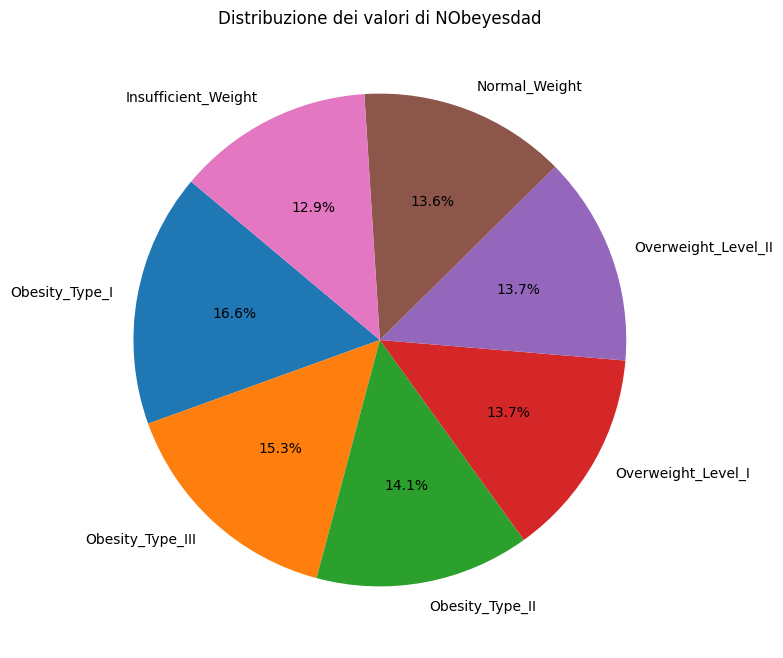

In [33]:
import matplotlib.pyplot as plt

# Analisi della distribuzione delle etichette della variabile target
conteggio_categorie = dataset['NObeyesdad'].value_counts()

# Creazione di un grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(conteggio_categorie, labels=conteggio_categorie.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione dei valori di NObeyesdad')
plt.show()

Il grafico a torta mostra un buon bilanciamento delle classi nella variabile target. Questo aspetto verrà approfondito in fase di Data Balancing.

# **Data Preparation**

## **Data Cleaning**

In [34]:
#Rimozione dei duplicati
dataset = dataset.drop_duplicates()

print("Dataset senza duplicati:")
display(dataset)

Dataset senza duplicati:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## **Feature Scaling**

Alcune feature presentano valori continui quando il range dovrebbe essere discreto: vanno quindi modificate.

In [35]:
# Arrotondamento delle colonne con valori numerici

dataset['CH2O'] = dataset['CH2O'].astype(int)
dataset['FAF'] = dataset['FAF'].round().astype(int)
dataset['TUE'] = dataset['TUE'].round().astype(int)
dataset['FCVC'] = dataset['FCVC'].round().astype(int)
dataset['NCP'] = dataset['NCP'].round().astype(int)

display(dataset)
dataset.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3,3,Sometimes,no,1,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.425970,2.703402,1.705798,1.009104,0.669861
std,6.368801,0.093186,26.190847,0.585177,0.797108,0.591308,0.898712,0.673970
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,3.000000,1.000000,0.000000,0.000000
50%,22.847618,1.701584,83.101100,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Alcuni modelli di apprendimento potrebbero avere dei problemi con variabili non numeriche: le feature con valori yes/no avranno valori 1/0, mentre quelle che esprimono valori categorici diventeranno range numerici.

In [36]:
# Colonne da trasformare in binarie
colonne_da_binarizzare = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Colonne da trasformare in range
colonne_in_range = ['CAEC','CALC','MTRANS']

for colonna in colonne_da_binarizzare:
    dataset[colonna] = dataset[colonna].map({'yes': 1, 'no': 0} if colonna != 'Gender' else {'Male': 1, 'Female': 0})

for colonna in colonne_in_range:
    if colonna != 'MTRANS':
        dataset[colonna] = dataset[colonna].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
    elif colonna == 'MTRANS':
        dataset[colonna] = dataset[colonna].map({'Public_Transportation': 0, 'Automobile': 1, 'Walking': 2, 'Motorbike': 3, 'Bike': 4})


dataset['NObeyesdad'] = dataset['NObeyesdad'].map({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2,
                                                   'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6})
display(dataset)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2,3,1,0,2,0,0,1,0,0,1
1,0,21.000000,1.520000,56.000000,1,0,3,3,1,1,3,1,3,0,1,0,1
2,1,23.000000,1.800000,77.000000,1,0,2,3,1,0,2,0,2,1,2,0,1
3,1,27.000000,1.800000,87.000000,0,0,3,3,1,0,2,0,2,0,2,2,2
4,1,22.000000,1.780000,89.800000,0,0,2,1,1,0,2,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3,3,1,0,1,0,2,1,1,0,6
2107,0,21.982942,1.748584,133.742943,1,1,3,3,1,0,2,0,1,1,1,0,6
2108,0,22.524036,1.752206,133.689352,1,1,3,3,1,0,2,0,1,1,1,0,6
2109,0,24.361936,1.739450,133.346641,1,1,3,3,1,0,2,0,1,1,1,0,6


Età e peso sono in un dominio di valori ben più ampio rispetto alle altre feature e alcuni modelli potrebbero pensare che siano più rilevanti solo per questo. Ecco perchè i loro valori verranno normalizzati.

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Normalizzazione di età e peso con il MinMax
colonne_da_normalizzare = ['Age', 'Weight']
min_max_scaler = MinMaxScaler()

dataset[colonne_da_normalizzare] = min_max_scaler.fit_transform(dataset[colonne_da_normalizzare])

display(dataset)

dataset.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0.148936,1.620000,0.186567,1,0,2,3,1,0,2,0,0,1,0,0,1
1,0,0.148936,1.520000,0.126866,1,0,3,3,1,1,3,1,3,0,1,0,1
2,1,0.191489,1.800000,0.283582,1,0,2,3,1,0,2,0,2,1,2,0,1
3,1,0.276596,1.800000,0.358209,0,0,3,3,1,0,2,0,2,0,2,2,2
4,1,0.170213,1.780000,0.379104,0,0,2,1,1,0,2,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0.148443,1.710730,0.689616,1,1,3,3,1,0,1,0,2,1,1,0,6
2107,0,0.169850,1.748584,0.707037,1,1,3,3,1,0,2,0,1,1,1,0,6
2108,0,0.181362,1.752206,0.706637,1,1,3,3,1,0,2,0,1,1,1,0,6
2109,0,0.220467,1.739450,0.704079,1,1,3,3,1,0,2,0,1,1,1,0,6


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,0.504073,0.220279,1.702674,0.357155,0.825108,0.883565,2.425970,2.703402,1.146143,0.021083,1.705798,0.045999,1.009104,0.669861,0.729756,0.300431,3.132247
std,0.500103,0.135506,0.093186,0.195454,0.379966,0.320823,0.585177,0.797108,0.459494,0.143695,0.591308,0.209533,0.898712,0.673970,0.517008,0.578717,1.985747
min,0.000000,0.000000,1.450000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.125871,1.630178,0.201493,1.000000,1.000000,2.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.188247,1.701584,0.329113,1.000000,1.000000,2.000000,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000
75%,1.000000,0.255319,1.769491,0.515044,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.000000,0.000000,2.000000,1.000000,1.000000,1.000000,5.000000
max,1.000000,1.000000,1.980000,1.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


## **Feature Selection**

**In questa fase vengono analizzate la varianza di ogni feature e la matrice di correlazione al fine di selezionare solo le colonne più significative.**

Si inizia con la varianza:

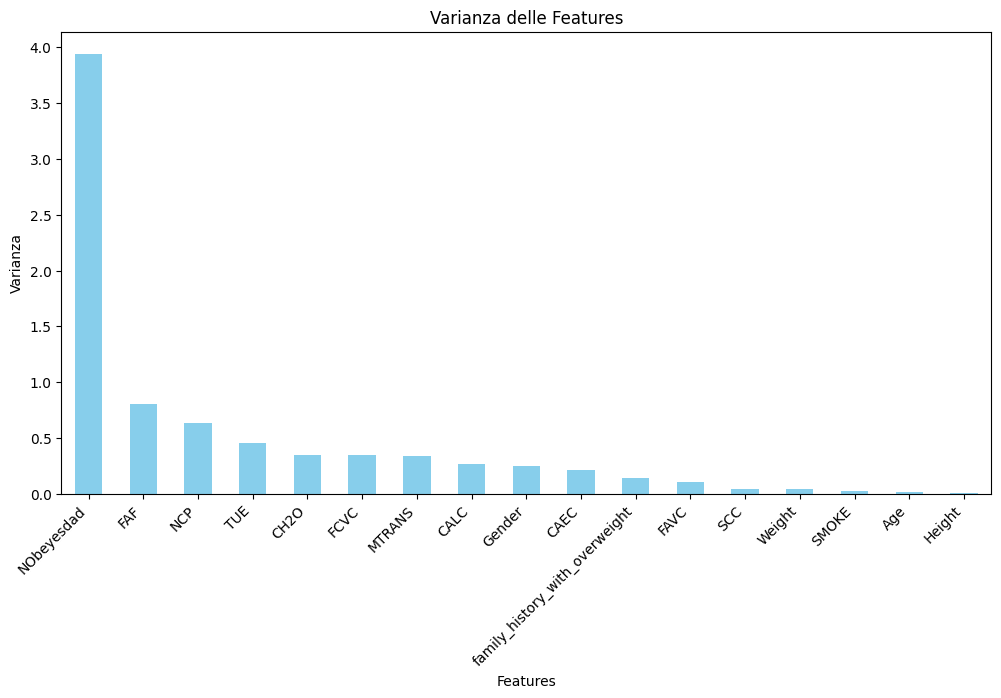

In [38]:
# Calcolo della varianza delle feature
variances = dataset.var()

variances_sorted = variances.sort_values(ascending=False)

# Creazione di un grafico a barre
plt.figure(figsize=(12, 6))
variances_sorted.plot(kind='bar', color='skyblue')
plt.title('Varianza delle Features')
plt.xlabel('Features')
plt.ylabel('Varianza')
plt.xticks(rotation=45, ha='right')
plt.show()


Segue la matrice di correlazione:

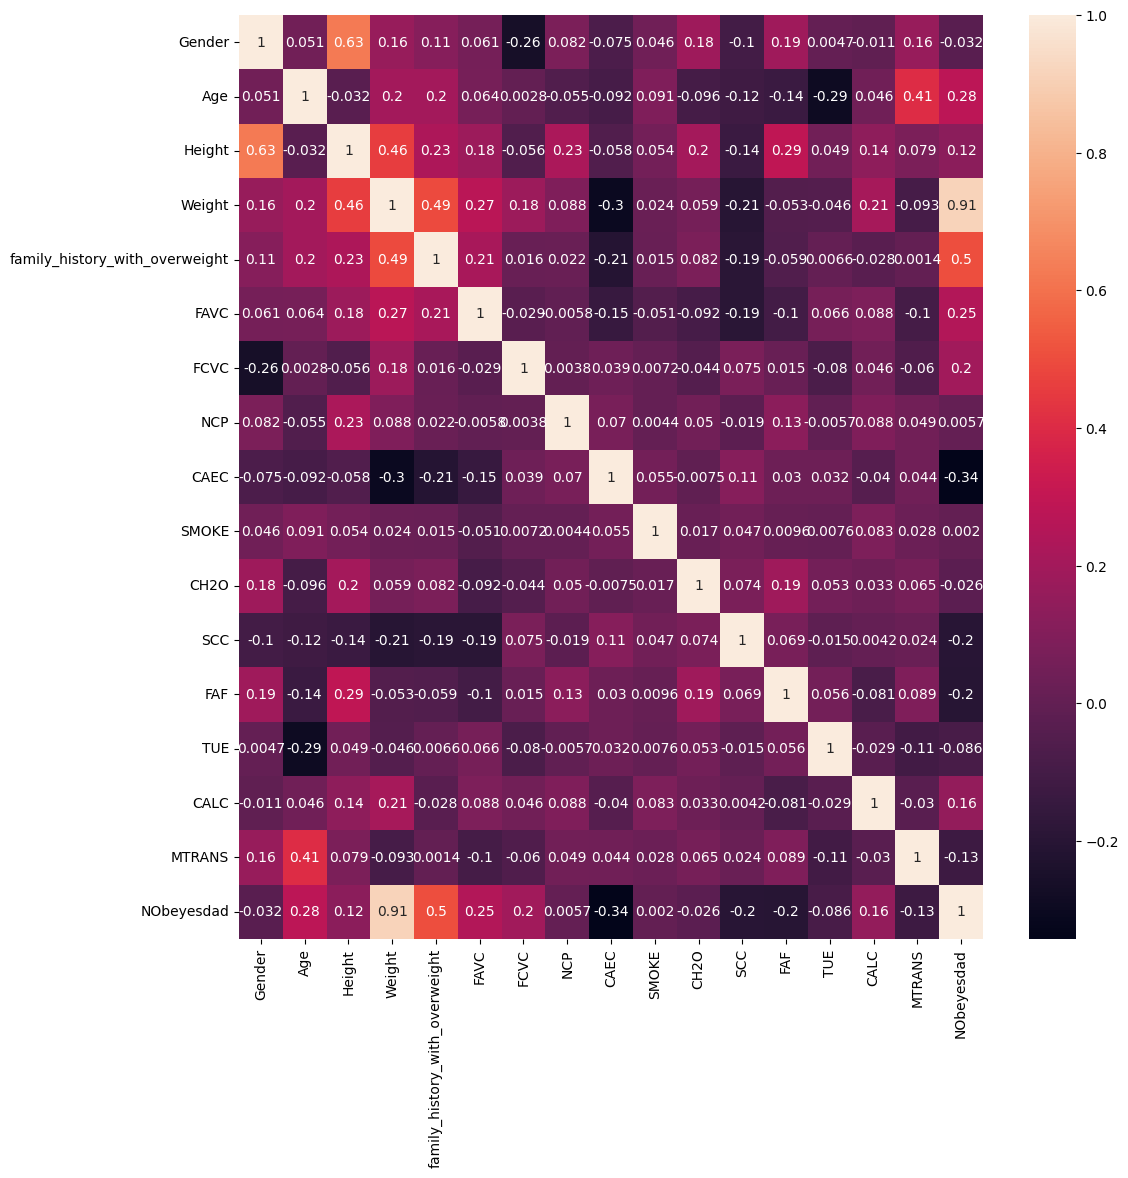

In [39]:
import seaborn as sns

# Calcolo della matrice di correlazione per tutte le colonne
correlation_matrix = dataset.corr()

# Creazione di una heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


Per avere un quadro ancora più chiaro della correlazione, ho deciso di usare una visualizzazione più semplice tramite una tabella:

In [40]:
# Tabella con le correlazioni rispetto alla y
target_correlation = correlation_matrix['NObeyesdad'].round(3)
df_target_correlation = pd.DataFrame(target_correlation)

display(df_target_correlation)


,NObeyesdad
Gender,-0.032
Age,0.279
Height,0.125
Weight,0.912
family_history_with_overweight,0.503
FAVC,0.250
FCVC,0.196
NCP,0.006
CAEC,-0.342
SMOKE,0.002


In [41]:
# Creazione di un DataFrame per le sole correlazioni negative
negative_correlations = target_correlation[target_correlation < 0]

df_negative_correlations = pd.DataFrame(negative_correlations)
display(df_negative_correlations)


,NObeyesdad
Gender,-0.032
CAEC,-0.342
CH2O,-0.026
SCC,-0.198
FAF,-0.203
TUE,-0.086
MTRANS,-0.127


Analizzando varianza e correlation matrix ho deciso di rimuovere CAEC e SCC tra le feature del dataset

In [42]:
# Eliminazione delle feature
dataset = dataset.drop(['CAEC', 'SCC'], axis=1)

display(dataset)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0.148936,1.620000,0.186567,1,0,2,3,0,2,0,1,0,0,1
1,0,0.148936,1.520000,0.126866,1,0,3,3,1,3,3,0,1,0,1
2,1,0.191489,1.800000,0.283582,1,0,2,3,0,2,2,1,2,0,1
3,1,0.276596,1.800000,0.358209,0,0,3,3,0,2,2,0,2,2,2
4,1,0.170213,1.780000,0.379104,0,0,2,1,0,2,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0.148443,1.710730,0.689616,1,1,3,3,0,1,2,1,1,0,6
2107,0,0.169850,1.748584,0.707037,1,1,3,3,0,2,1,1,1,0,6
2108,0,0.181362,1.752206,0.706637,1,1,3,3,0,2,1,1,1,0,6
2109,0,0.220467,1.739450,0.704079,1,1,3,3,0,2,1,1,1,0,6


## **Data Balancing**

**In questa fase viene analizzata la distribuzione delle classi della variabile dipendente.**


In [43]:
class_distribution = dataset['NObeyesdad'].value_counts()
print(class_distribution)

4    351
6    324
5    297
3    290
1    282
2    276
0    267
Name: NObeyesdad, dtype: int64


Siccome c'è un leggero sbilanciamento tra le classi, ho deciso di usare ADASYN per modificare questo aspetto.

In [44]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

# Divisione delle feature e della variabile dipendente
X = dataset.drop(['NObeyesdad'], axis=1)
y = dataset['NObeyesdad']

# Divisione del dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Dimensione massima per ogni classe
target_size = 351

# Conta il numero di istanze per ogni classe nel set di addestramento
class_counts = y_train.value_counts().to_dict()

# Imposta la dimensione di ogni classe pari al massimo tra il target_size e la contabilità effettiva
sampling_strategy = {
    classe: max(target_size, count) for classe, count in class_counts.items()
}

# Creazione di un'istanza di ADASYN con la strategia di oversampling definita sopra
adasyn = ADASYN(sampling_strategy=sampling_strategy, random_state=42)

# Applicazione di ADASYN al training set
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Creazione di un nuovo Dataset con le modifiche di ADASYN
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name='NObeyesdad')
dataset_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

display(dataset_resampled)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (351) in class 4 will be larger than the number of samples in the majority class (class #4 -> 235)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (351) in class 6 will be larger than the number of samples in the majority class (class #4 -> 235)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (351) in class 3 will be larger than the number of samples in the majority class (class #4 -> 235)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (351) in class 5 will be larger than the number of samples in the majority class (class #4 -> 235)
  warnings.warn(
/usr/local/l

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0.659574,1.630000,0.283582,1,1,2,3,0,1,0,0,0,1,3
1,0,0.103487,1.560029,0.244239,1,0,3,3,0,2,1,1,1,0,3
2,1,0.148936,1.700000,0.194030,1,1,2,3,0,1,1,1,0,0,1
3,1,0.373859,1.767485,0.605657,1,1,3,3,0,2,1,0,1,1,5
4,1,0.153311,1.704573,0.305970,1,1,2,3,0,2,3,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,0,0.117919,1.825712,0.884698,1,1,3,3,0,2,2,1,1,0,6
2454,0,0.112478,1.837486,0.913049,1,1,3,3,0,2,2,1,1,0,6
2455,0,0.089845,1.864372,0.984948,1,1,3,3,0,2,2,1,1,0,6
2456,0,0.091796,1.860971,0.976492,1,1,3,3,0,2,2,1,1,0,6


Il dataset originale è stato diviso in quanto il leggero sbilanciamento sarà un fattore di valutazione per il modello di apprendimento. L'unico dataset che ha subito oversampling è stato quello di training.

In [47]:
# Analisi della presenza di dati duplicati nel dataset di training
duplicated_data = dataset_resampled[dataset_resampled.duplicated()]
numero_duplicati = dataset_resampled.duplicated().sum()

percentuale_duplicati = (numero_duplicati / len(dataset_resampled)) * 100

if duplicated_data.empty:
    print("Nessun dato duplicato trovato.")
else:
    print("Dati duplicati trovati:", numero_duplicati)
    print(f"Percentuale dei dati duplicati:  {percentuale_duplicati:.2f}%")
    display(duplicated_data)

Nessun dato duplicato trovato.


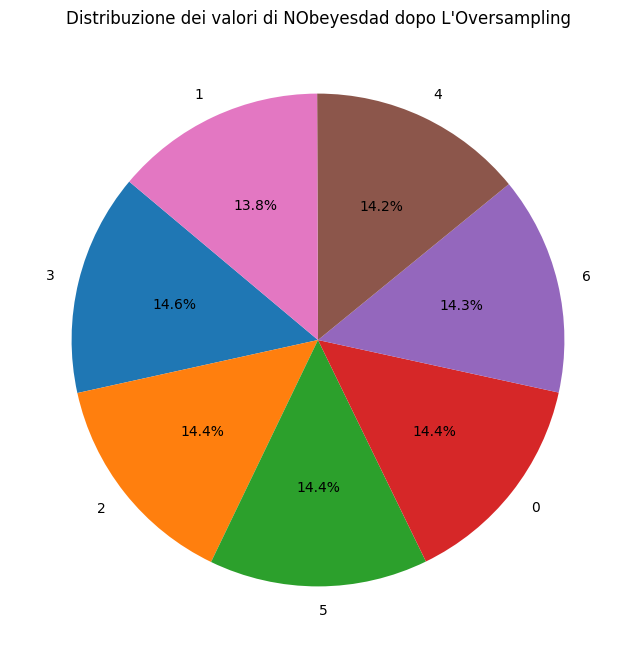

In [46]:
# Analisi della distribuzione delle etichette della variabile target
conteggio_categorie = dataset_resampled['NObeyesdad'].value_counts()

# Creazione di un grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(conteggio_categorie, labels=conteggio_categorie.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione dei valori di NObeyesdad dopo L\'Oversampling')
plt.show()

Il bilanciamento attuale è soddisfacente, quindi si può passare alla fase di Modeling.

# **Modeling**

**Verranno usati il Decision Tree e il Random Forest per l'addestramento del modello**

## **Decision Tree**

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Addestramento del modello Decision Tree sul dataset sovracampionato
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_resampled, y_resampled)

# Predizione sul test set originale
y_pred_dt = decision_tree_model.predict(X_test)

# Valutazione delle prestazioni del modello sul test set originale
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy:.3f}')

print('\nClassification Report:\n', classification_report(y_test, y_pred_dt, digits=3))


Decision Tree Accuracy: 0.939

Classification Report:
               precision    recall  f1-score   support

           0      0.927     0.957     0.942        93
           1      0.914     0.825     0.867       103
           2      0.840     0.898     0.868        88
           3      0.897     0.929     0.912        84
           4      0.982     0.966     0.974       116
           5      0.990     0.990     0.990       103
           6      1.000     1.000     1.000       102

    accuracy                          0.939       689
   macro avg      0.936     0.938     0.936       689
weighted avg      0.940     0.939     0.939       689



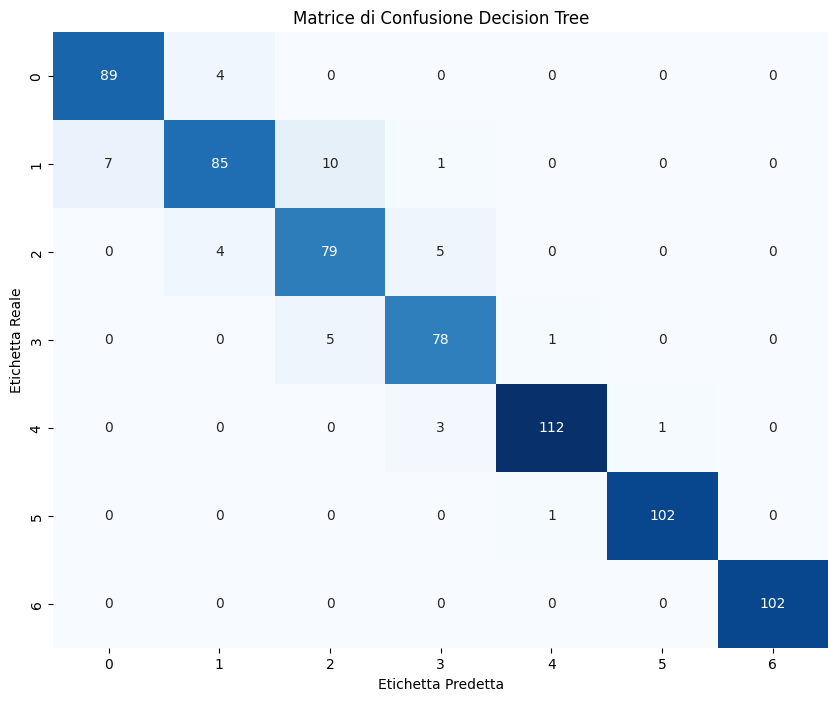

In [49]:
from sklearn.metrics import confusion_matrix

# Calcolo della matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred_dt)

classi_target = [0, 1, 2, 3, 4, 5, 6]
conf_matrix_df = pd.DataFrame(conf_matrix, index=classi_target, columns=classi_target)

# Visualizzazione della matrice
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice di Confusione Decision Tree')
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Reale')
plt.show()


La matrice di confusione mostra che l'algoritmo è stato molto bravo nella valutazione delle classi estreme e meno preciso nella valutazione delle classi intermedie.

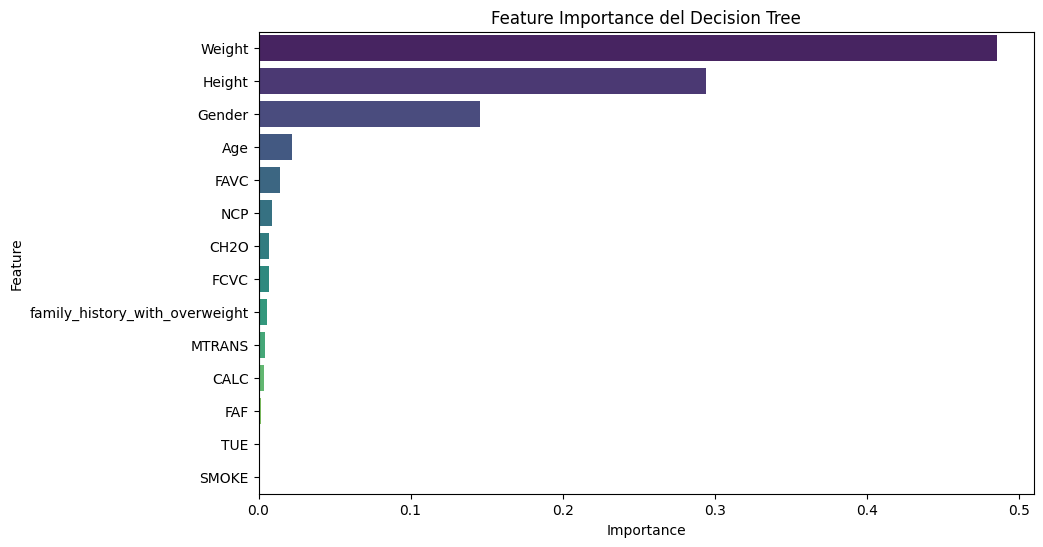

In [50]:
#Calcolo delle feature più importanti per il DT
feature_importances_dt = decision_tree_model.feature_importances_

feature_importance_dt_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_dt})

feature_importance_dt_df = feature_importance_dt_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_dt_df, palette='viridis', dodge=False)
plt.title('Feature Importance del Decision Tree')
plt.show()



Il grafico soprastante mostra come le feature più importanti per il DT siano state peso, altezza e sesso dell'individuo.

## **Random Forest**

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Addestramento del modello
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Assegnazione dei nomi delle colonne come attributo del RF
random_forest_model.feature_names = X_train.columns

# Predizione sul test set
y_pred_rf = random_forest_model.predict(X_test)

# Valutazioni
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.3f}')

print('\nRandom Forest Classification Report:\n', classification_report(y_test, y_pred_rf, digits=3))


Random Forest Accuracy: 0.943

Random Forest Classification Report:
               precision    recall  f1-score   support

           0      0.908     0.957     0.932        93
           1      0.862     0.786     0.822       103
           2      0.882     0.932     0.906        88
           3      0.942     0.964     0.953        84
           4      0.991     0.974     0.983       116
           5      1.000     0.990     0.995       103
           6      1.000     1.000     1.000       102

    accuracy                          0.943       689
   macro avg      0.941     0.943     0.942       689
weighted avg      0.943     0.943     0.943       689



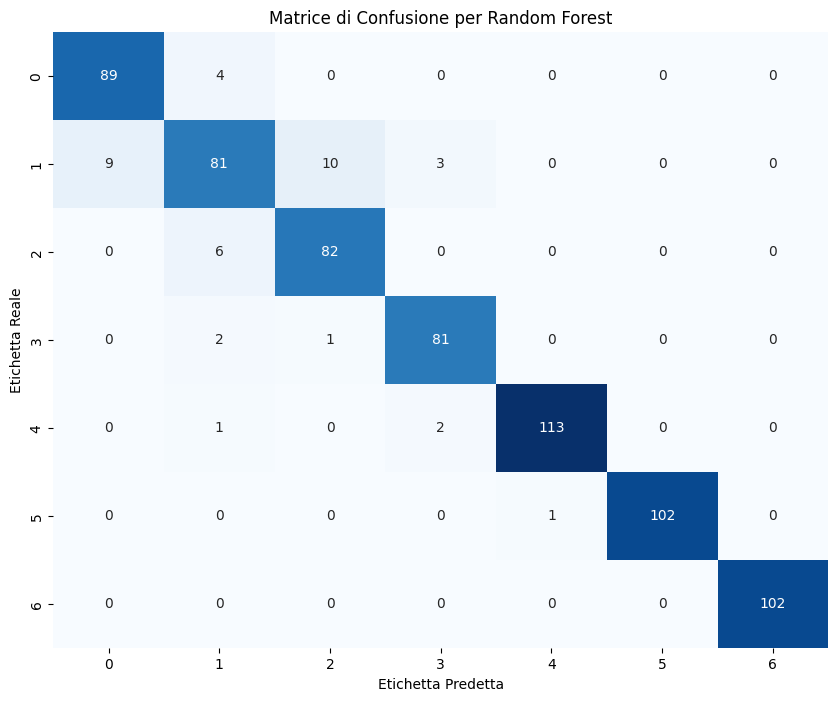

In [52]:
#Matrice di confusione
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

classi_target = [0, 1, 2, 3, 4, 5, 6]
conf_matrix_rf_df = pd.DataFrame(conf_matrix_rf, index=classi_target, columns=classi_target)

# Visualizza la matrice di confusione con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Reale')
plt.title('Matrice di Confusione per Random Forest')
plt.show()


La matrice di confusione di sopra mostra come il RF sia stato più preciso sulle classi centrali rispetto al DT, e questo è sicuramente un fattore rilevante.


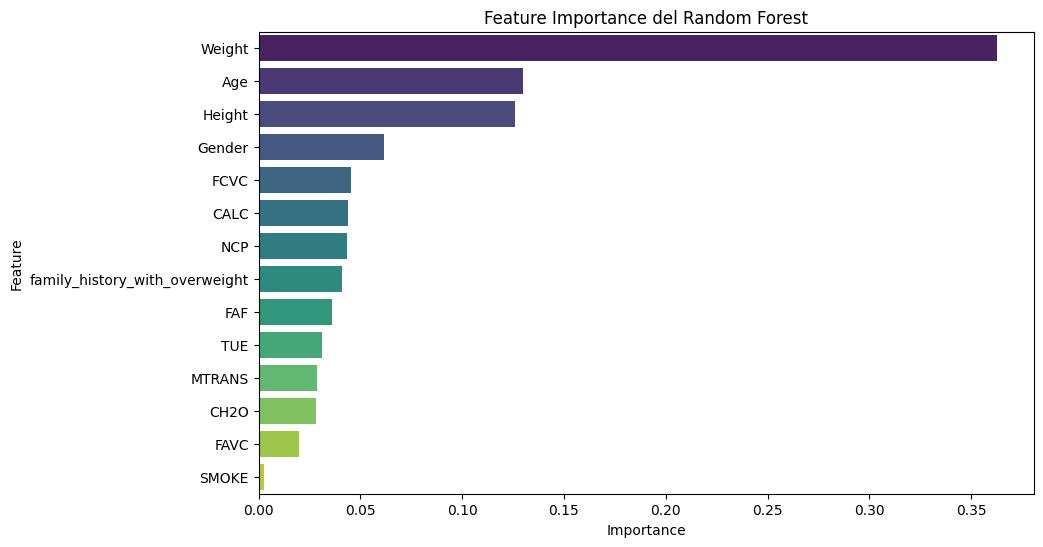

In [53]:
# Calcolo delle feature più importanti per il Random Forest
feature_importances_rf = random_forest_model.feature_importances_

feature_importance_rf_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})

feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_rf_df, palette='viridis', dodge=False)
plt.title('Feature Importance del Random Forest')
plt.show()


In questo caso le feature più importanti sono state peso, età ed altezza

# **Evaluation**

I grafici precedenti, uniti alle metriche di valutazione, mostrano come i due algoritmi sono praticamente equivalenti sul problema in esame, ma quello che ha sbagliato di meno è stato il Random Forest.
Esso verrà usato per il deployment del progetto.

# **Deployment**

L'ultima fase richiede la costruzione di una demo del progetto, ma questo non avverrà in questo file bensì in "DemoOP.py".

In [54]:
from joblib import dump

dump(random_forest_model, 'modelRF.joblib')


['modelRF.joblib']

In [55]:
dump(min_max_scaler, "minmax_scaler.joblib")


['minmax_scaler.joblib']

Ho quindi scaricato il modello addestrato per poterlo utilizzare come base di partenza della Demo.